In [1]:
import pandas as pd
import seaborn as sns
import gradio as gr
import warnings
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error
warnings.filterwarnings("ignore")

# Data Analysis

In [2]:
df = pd.read_csv('Laptop price.csv')
dfgr = df.copy()
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Res_Width,Res_Height,Touchscreen,PanelType,SSD(GB),HDD(GB),ClockSpeed(GHz),CPU,GPU,Price
0,Apple,Ultrabook,13.3,8,macOS,1.37,2560,1600,False,IPS Panel Retina Display,128,0,2.3,Intel Core i5,Intel Iris,1339.69
1,Apple,Ultrabook,13.3,8,macOS,1.34,1440,900,False,Unknown,128,0,1.8,Intel Core i5,Intel HD Graphics,898.94
2,HP,Notebook,15.6,8,No OS,1.86,1920,1080,False,Unknown,256,0,2.5,Intel Core i5,Intel HD Graphics,575.00
3,Apple,Ultrabook,15.4,16,macOS,1.83,2880,1800,False,IPS Panel Retina Display,512,0,2.7,Intel Core i7,AMD,2537.45
4,Apple,Ultrabook,13.3,8,macOS,1.37,2560,1600,False,IPS Panel Retina Display,256,0,3.1,Intel Core i5,Intel Iris,1803.60


## DataFrame info

In [3]:
print(pd.concat([df.isnull().sum(), df.dtypes, df.nunique()],axis=1, keys=['Null values', 'Datatype', 'Unique values']))

                 Null values Datatype  Unique values
Company                    0   object             19
TypeName                   0   object              6
Inches                     0  float64             18
Ram                        0    int64              9
OpSys                      0   object              9
Weight                     0  float64            171
Res_Width                  0    int64             13
Res_Height                 0    int64             10
Touchscreen                0     bool              2
PanelType                  0   object              3
SSD(GB)                    0    int64             11
HDD(GB)                    0    int64              7
ClockSpeed(GHz)            0  float64             25
CPU                        0   object              5
GPU                        0   object              6
Price                      0  float64            791


# Encoding

In [4]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['Company', 'TypeName', 'OpSys', 'PanelType', 'CPU', 'GPU'], dtype='object')

In [5]:
def printUnique(columns:list):
    for col in columns:
        print(f"{col}: {list(df[col].unique())}")

In [6]:
printUnique(categorical_cols)

Company: ['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI', 'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer', 'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG']
TypeName: ['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible', 'Workstation']
OpSys: ['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android', 'Windows 10 S', 'Chrome OS', 'Windows 7']
PanelType: ['IPS Panel Retina Display', 'Unknown', 'IPS Panel']
CPU: ['Intel Core i5', 'Intel Core i7', 'AMD', 'Intel Core i3', 'Intel Other']
GPU: ['Intel Iris', 'Intel HD Graphics', 'AMD', 'Nvidia GeForce', 'Nvidia GTX', 'Nvidia Quadro']


### PanelType

In [7]:
df = pd.concat([df.drop('PanelType', axis=1),pd.get_dummies(df['PanelType'], dtype=int, prefix='panel')], axis=1)
df.drop('panel_Unknown', axis=1, inplace=True)
df.head(1)

,Company,TypeName,Inches,Ram,OpSys,Weight,Res_Width,Res_Height,Touchscreen,SSD(GB),HDD(GB),ClockSpeed(GHz),CPU,GPU,Price,panel_IPS Panel,panel_IPS Panel Retina Display
0,Apple,Ultrabook,13.3,8,macOS,1.37,2560,1600,False,128,0,2.3,Intel Core i5,Intel Iris,1339.69,0,1


### Company & TypeName

In [8]:
df = pd.concat([df.drop('Company', axis=1),pd.get_dummies(df['Company'], dtype=int, prefix='company', drop_first=True)], axis=1)
df = pd.concat([df.drop('TypeName', axis=1),pd.get_dummies(df['TypeName'], dtype=int, prefix='type', drop_first=True)], axis=1)

In [9]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['OpSys', 'CPU', 'GPU'], dtype='object')

### Operating system

In [10]:
df = pd.concat([df.drop('OpSys', axis=1),pd.get_dummies(df['OpSys'], dtype=int, prefix='os')], axis=1)
df.drop('os_No OS', axis=1, inplace=True)
df.head(1)

,Inches,Ram,Weight,Res_Width,Res_Height,Touchscreen,SSD(GB),HDD(GB),ClockSpeed(GHz),CPU,...,type_Ultrabook,type_Workstation,os_Android,os_Chrome OS,os_Linux,os_Mac OS X,os_Windows 10,os_Windows 10 S,os_Windows 7,os_macOS
0,13.3,8,1.37,2560,1600,False,128,0,2.3,Intel Core i5,...,1,0,0,0,0,0,0,0,0,1


### CPU

In [11]:
df = pd.concat([df.drop('CPU', axis=1),pd.get_dummies(df['CPU'], dtype=int, prefix='cpu')], axis=1)
df.drop('cpu_Intel Other', axis=1, inplace=True)
df.head(1)

,Inches,Ram,Weight,Res_Width,Res_Height,Touchscreen,SSD(GB),HDD(GB),ClockSpeed(GHz),GPU,...,os_Linux,os_Mac OS X,os_Windows 10,os_Windows 10 S,os_Windows 7,os_macOS,cpu_AMD,cpu_Intel Core i3,cpu_Intel Core i5,cpu_Intel Core i7
0,13.3,8,1.37,2560,1600,False,128,0,2.3,Intel Iris,...,0,0,0,0,0,1,0,0,1,0


### GPU

In [12]:
df = pd.concat([df.drop('GPU', axis=1),pd.get_dummies(df['GPU'], dtype=int, prefix='gpu')], axis=1)
df.drop('gpu_Intel HD Graphics', axis=1, inplace=True)
df.head(1)

,Inches,Ram,Weight,Res_Width,Res_Height,Touchscreen,SSD(GB),HDD(GB),ClockSpeed(GHz),Price,...,os_macOS,cpu_AMD,cpu_Intel Core i3,cpu_Intel Core i5,cpu_Intel Core i7,gpu_AMD,gpu_Intel Iris,gpu_Nvidia GTX,gpu_Nvidia GeForce,gpu_Nvidia Quadro
0,13.3,8,1.37,2560,1600,False,128,0,2.3,1339.69,...,1,0,0,1,0,0,1,0,0,0


# After Encoding

In [13]:
df.select_dtypes(include=object).columns

Index([], dtype='object')

In [14]:
df.shape

(1273, 52)

In [15]:
df.isna().any().value_counts()

False    52
Name: count, dtype: int64

# Visualization

In [16]:
cmap = sns.color_palette("blend:#047857,#6ee7b7",n_colors=20).as_hex()

def setGraphBG(title=False, subtitle=False, xlabel=False, ylabel=False, showlegend=False, xtick_angle=0, verbose=False):
   ax = plt.gca()
   ax.set_facecolor('#eff6ff')
   ax.spines['top'].set_visible(False)
   ax.spines['right'].set_visible(False)
   ax.spines['left'].set_visible(False)
   ax.spines['bottom'].set_visible(False)

   title_y = 1.22 if (showlegend and subtitle) else 1.15 if showlegend else 1.1 if subtitle else 1
   if title: plt.title(title, fontsize=20, y=title_y)
   plt.xlabel(xlabel,fontsize=16) if xlabel else plt.xlabel('')
   plt.ylabel(ylabel,fontsize=16) if ylabel else plt.ylabel('')
   plt.xticks(rotation=xtick_angle, fontsize=13)
   if showlegend: plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
   if subtitle: plt.figtext(x=0.5125, y=1.01 if showlegend else 0.92, s='('+subtitle+')', ha="center", fontsize=12)


   if verbose:
      for p in ax.patches:
         ax.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Correlation

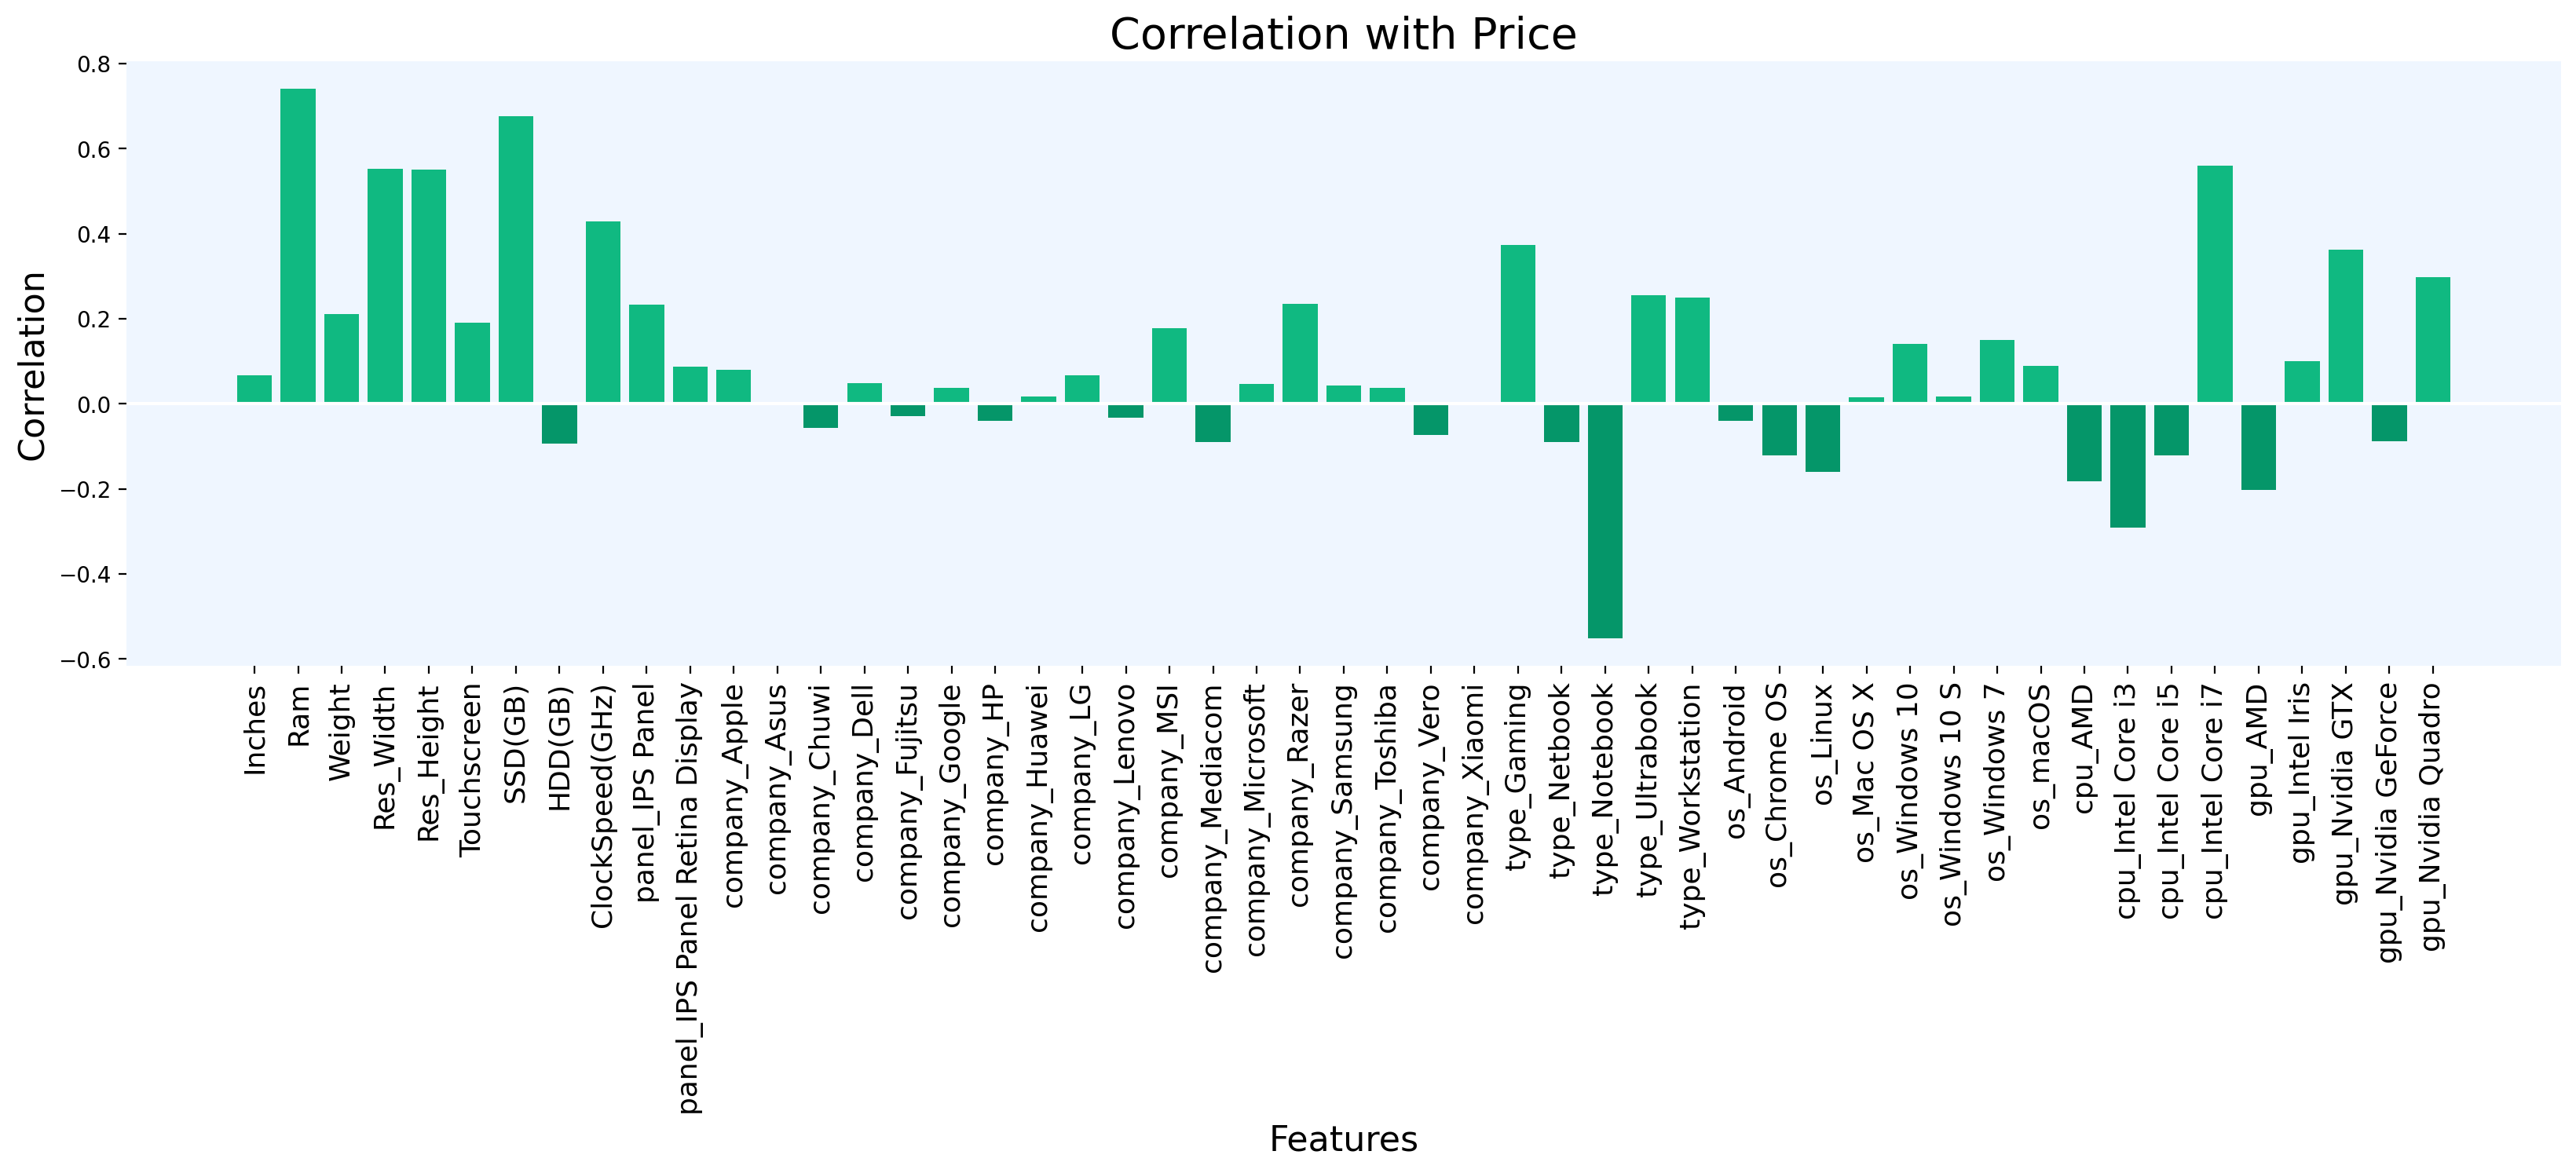

In [17]:
plt.figure(figsize=(20,5), dpi=200)
cor_df = df.corr()['Price']
cor_df.pop('Price')
colors = ['#10b981' if corr > 0 else '#059669' for corr in cor_df]
plt.bar(cor_df.index, cor_df, color=colors)
setGraphBG(title='Correlation with Price', xlabel='Features', ylabel='Correlation', xtick_angle=90)
plt.axhline(y=0, color='white')

## Train & Test Data

In [18]:
x = df.drop('Price', axis=1)
y = df['Price']

In [19]:
xtrain, xtest, ytrain, ytest = tts(x,y, test_size=0.3, random_state=38)

# Model Training

In [20]:
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest', 'Support Vector Machine']
traing_scores, testing_scores, mae, rmse = [], [], [], []

In [21]:
def evalute_model(model):
   train_score = model.score(xtrain,ytrain)
   test_score = model.score(xtest,ytest)
   pred = model.predict(xtest)
   model_mae = mean_absolute_error(ytest, pred)
   model_rmse = mean_squared_error(ytest, pred, squared=False)

   # Append
   traing_scores.append(train_score)
   testing_scores.append(test_score)
   mae.append(model_mae)
   rmse.append(model_rmse)

   # Print
   print(f'Train Accuracy\t: {train_score:.5f}')
   print(f'Test Accuracy\t: {test_score:.5f}')
   print(f'MAE\t\t: {model_mae:.4f}')
   print(f'RMSE\t\t: {model_rmse:.4f}')

## Linear Regression

In [22]:
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [23]:
evalute_model(reg)

Train Accuracy	: 0.80368
Test Accuracy	: 0.79035
MAE		: 217.2109
RMSE		: 307.2061


## Decision Tree

In [24]:
dt = DecisionTreeRegressor(random_state=92, max_depth=15, max_features=25, min_samples_leaf=2, max_leaf_nodes=63)
dt.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=15, max_features=25, max_leaf_nodes=63,
                      min_samples_leaf=2, random_state=92)

In [25]:
evalute_model(dt)

Train Accuracy	: 0.86785
Test Accuracy	: 0.80625
MAE		: 219.5253
RMSE		: 295.3252


## K-nearest neighbors (KNN)

In [26]:
knn = KNeighborsRegressor(n_jobs=-1, p=1)
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_jobs=-1, p=1)

In [27]:
evalute_model(knn)

Train Accuracy	: 0.80636
Test Accuracy	: 0.76871
MAE		: 215.4763
RMSE		: 322.6719


## Random Forest

In [28]:
rf = RandomForestRegressor(n_jobs=-1, random_state=95, max_depth=20, n_estimators=60, max_features=12)
rf.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=20, max_features=12, n_estimators=60, n_jobs=-1,
                      random_state=95)

In [29]:
evalute_model(rf)

Train Accuracy	: 0.97251
Test Accuracy	: 0.87616
MAE		: 161.9545
RMSE		: 236.1127


## Support Vector Machine (SVM)

In [30]:
svm = SVR(kernel='linear')
svm.fit(xtrain,ytrain)

SVR(kernel='linear')

In [31]:
evalute_model(svm)

Train Accuracy	: 0.69064
Test Accuracy	: 0.71453
MAE		: 255.1266
RMSE		: 358.4786


# Comparision

In [32]:
df_metrics = pd.DataFrame({'Model': models,'Training score':traing_scores,'Testing score':testing_scores,'MAE': mae, 'RMSE': rmse})
df_metrics

,Model,Training score,Testing score,MAE,RMSE
0,Logistic Regression,0.803683,0.790352,217.210929,307.206085
1,Decision Tree,0.867849,0.806254,219.525267,295.325239
2,KNN,0.806361,0.768712,215.476262,322.671904
3,Random Forest,0.972514,0.876157,161.954480,236.112686
4,Support Vector Machine,0.690641,0.714532,255.126603,358.478563


In [33]:
df_score = pd.melt(df_metrics, id_vars=['Model'], value_vars=['Training score','Testing score'],
                   var_name='Type', value_name='Accuracy')
df_error = pd.melt(df_metrics, id_vars=['Model'], value_vars=['MAE','RMSE'], var_name='Type', value_name='Error')

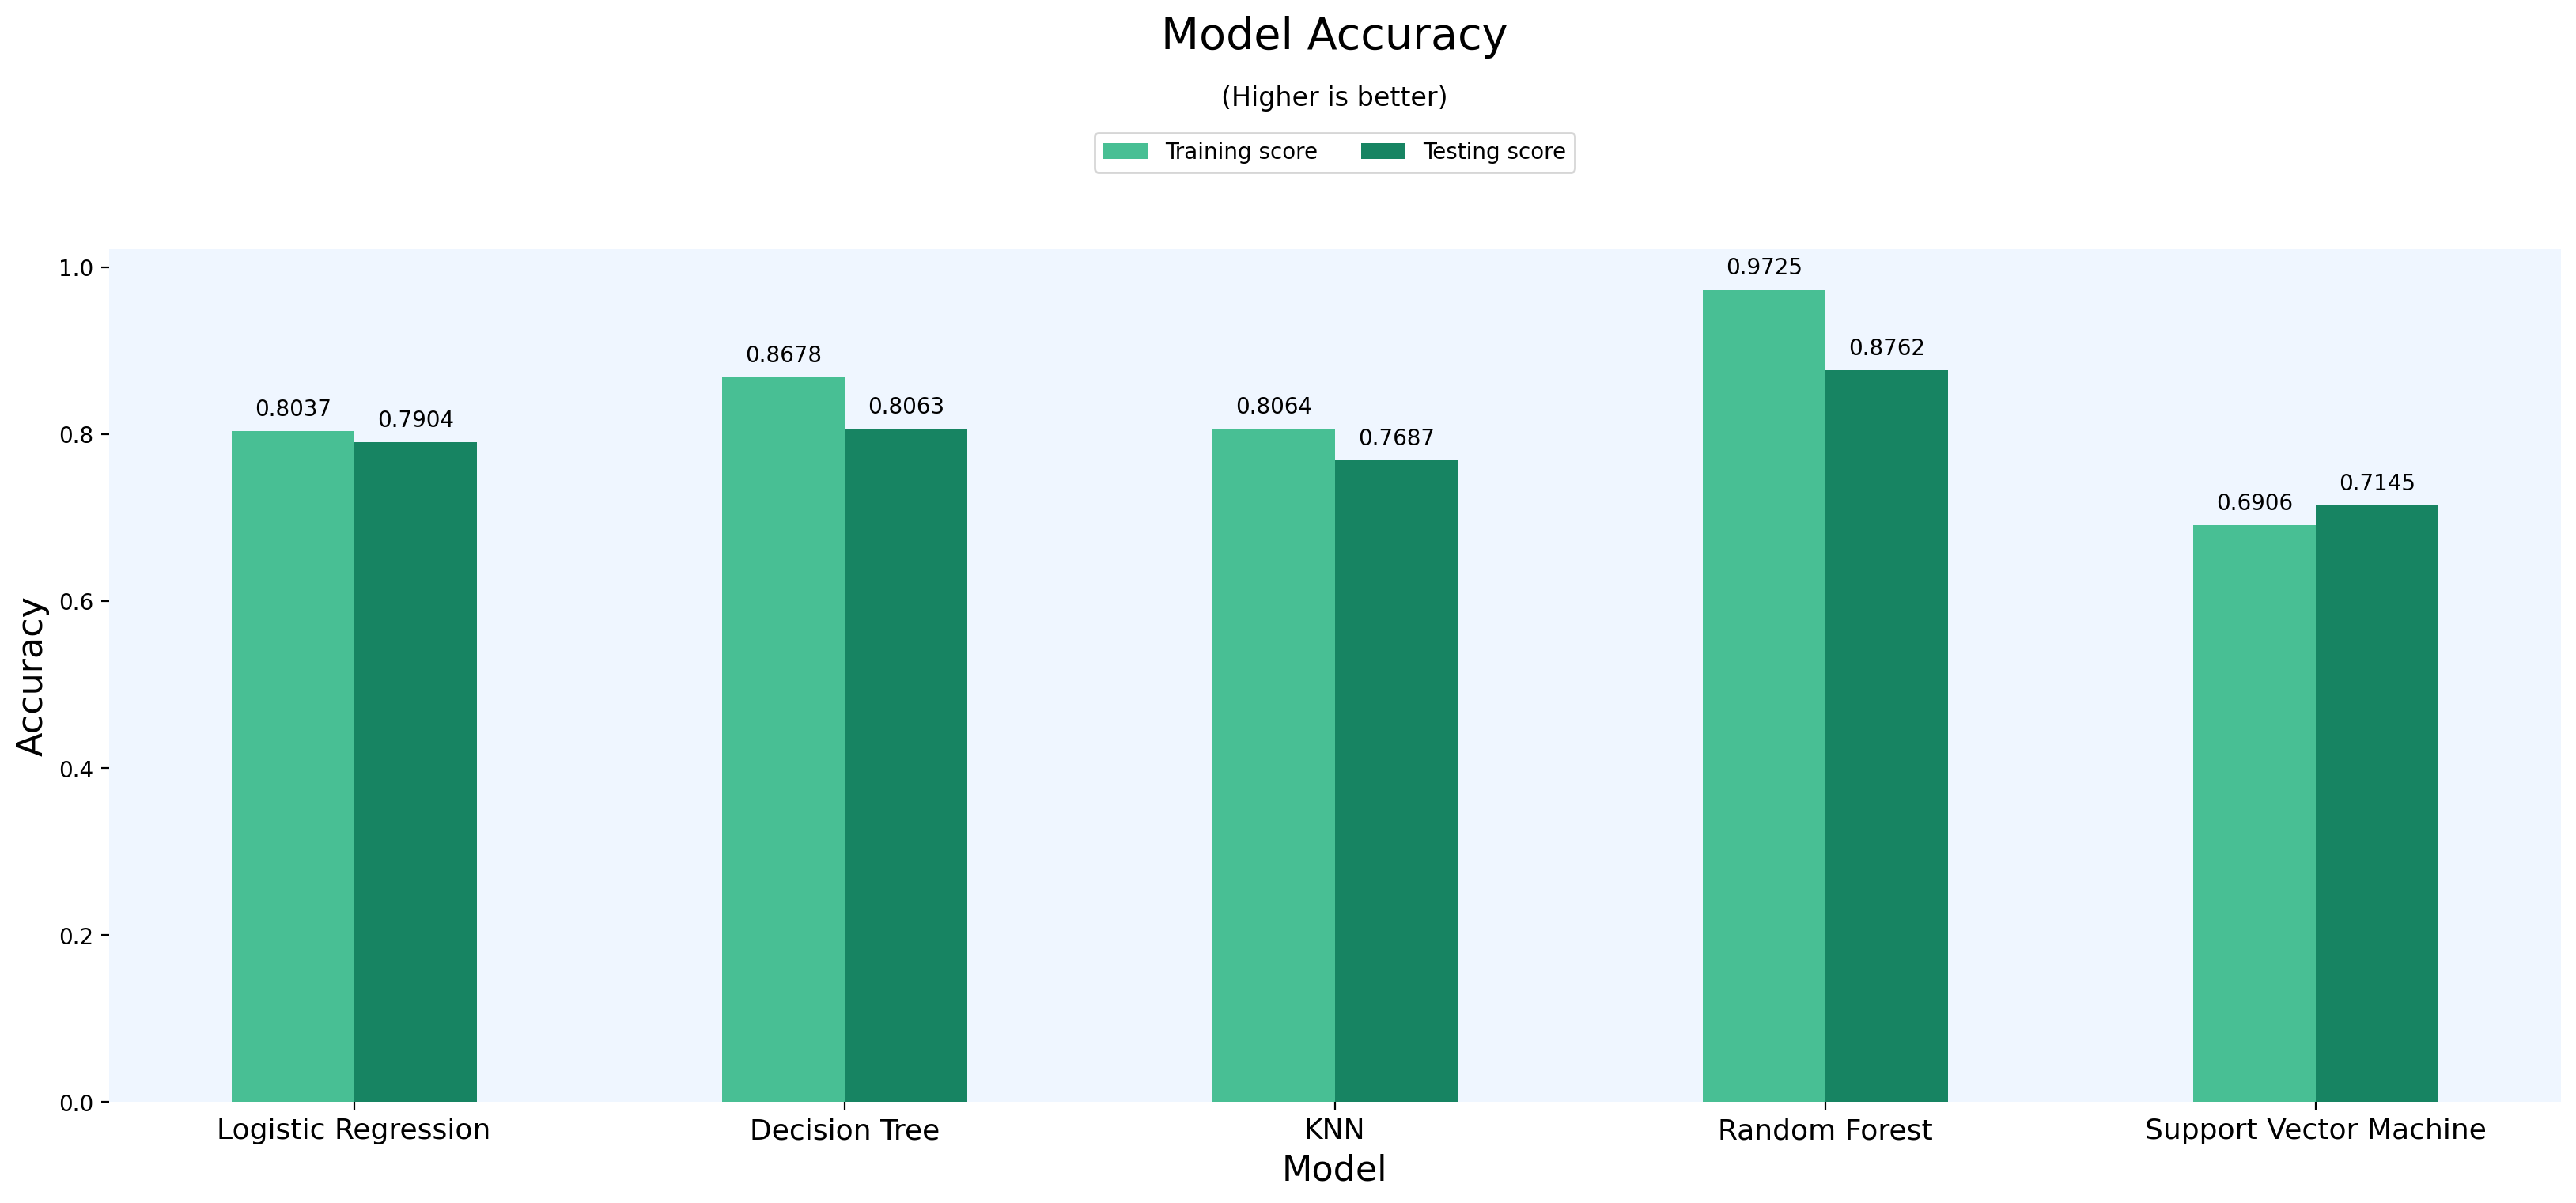

In [34]:
plt.figure(figsize=(20,7), dpi=200)
sns.barplot(data=df_score, x='Model', y='Accuracy', hue='Type', width=0.5, palette=['#34d399', '#059669'])
setGraphBG(title='Model Accuracy', subtitle='Higher is better', xlabel='Model', ylabel='Accuracy', showlegend=True, verbose=True)

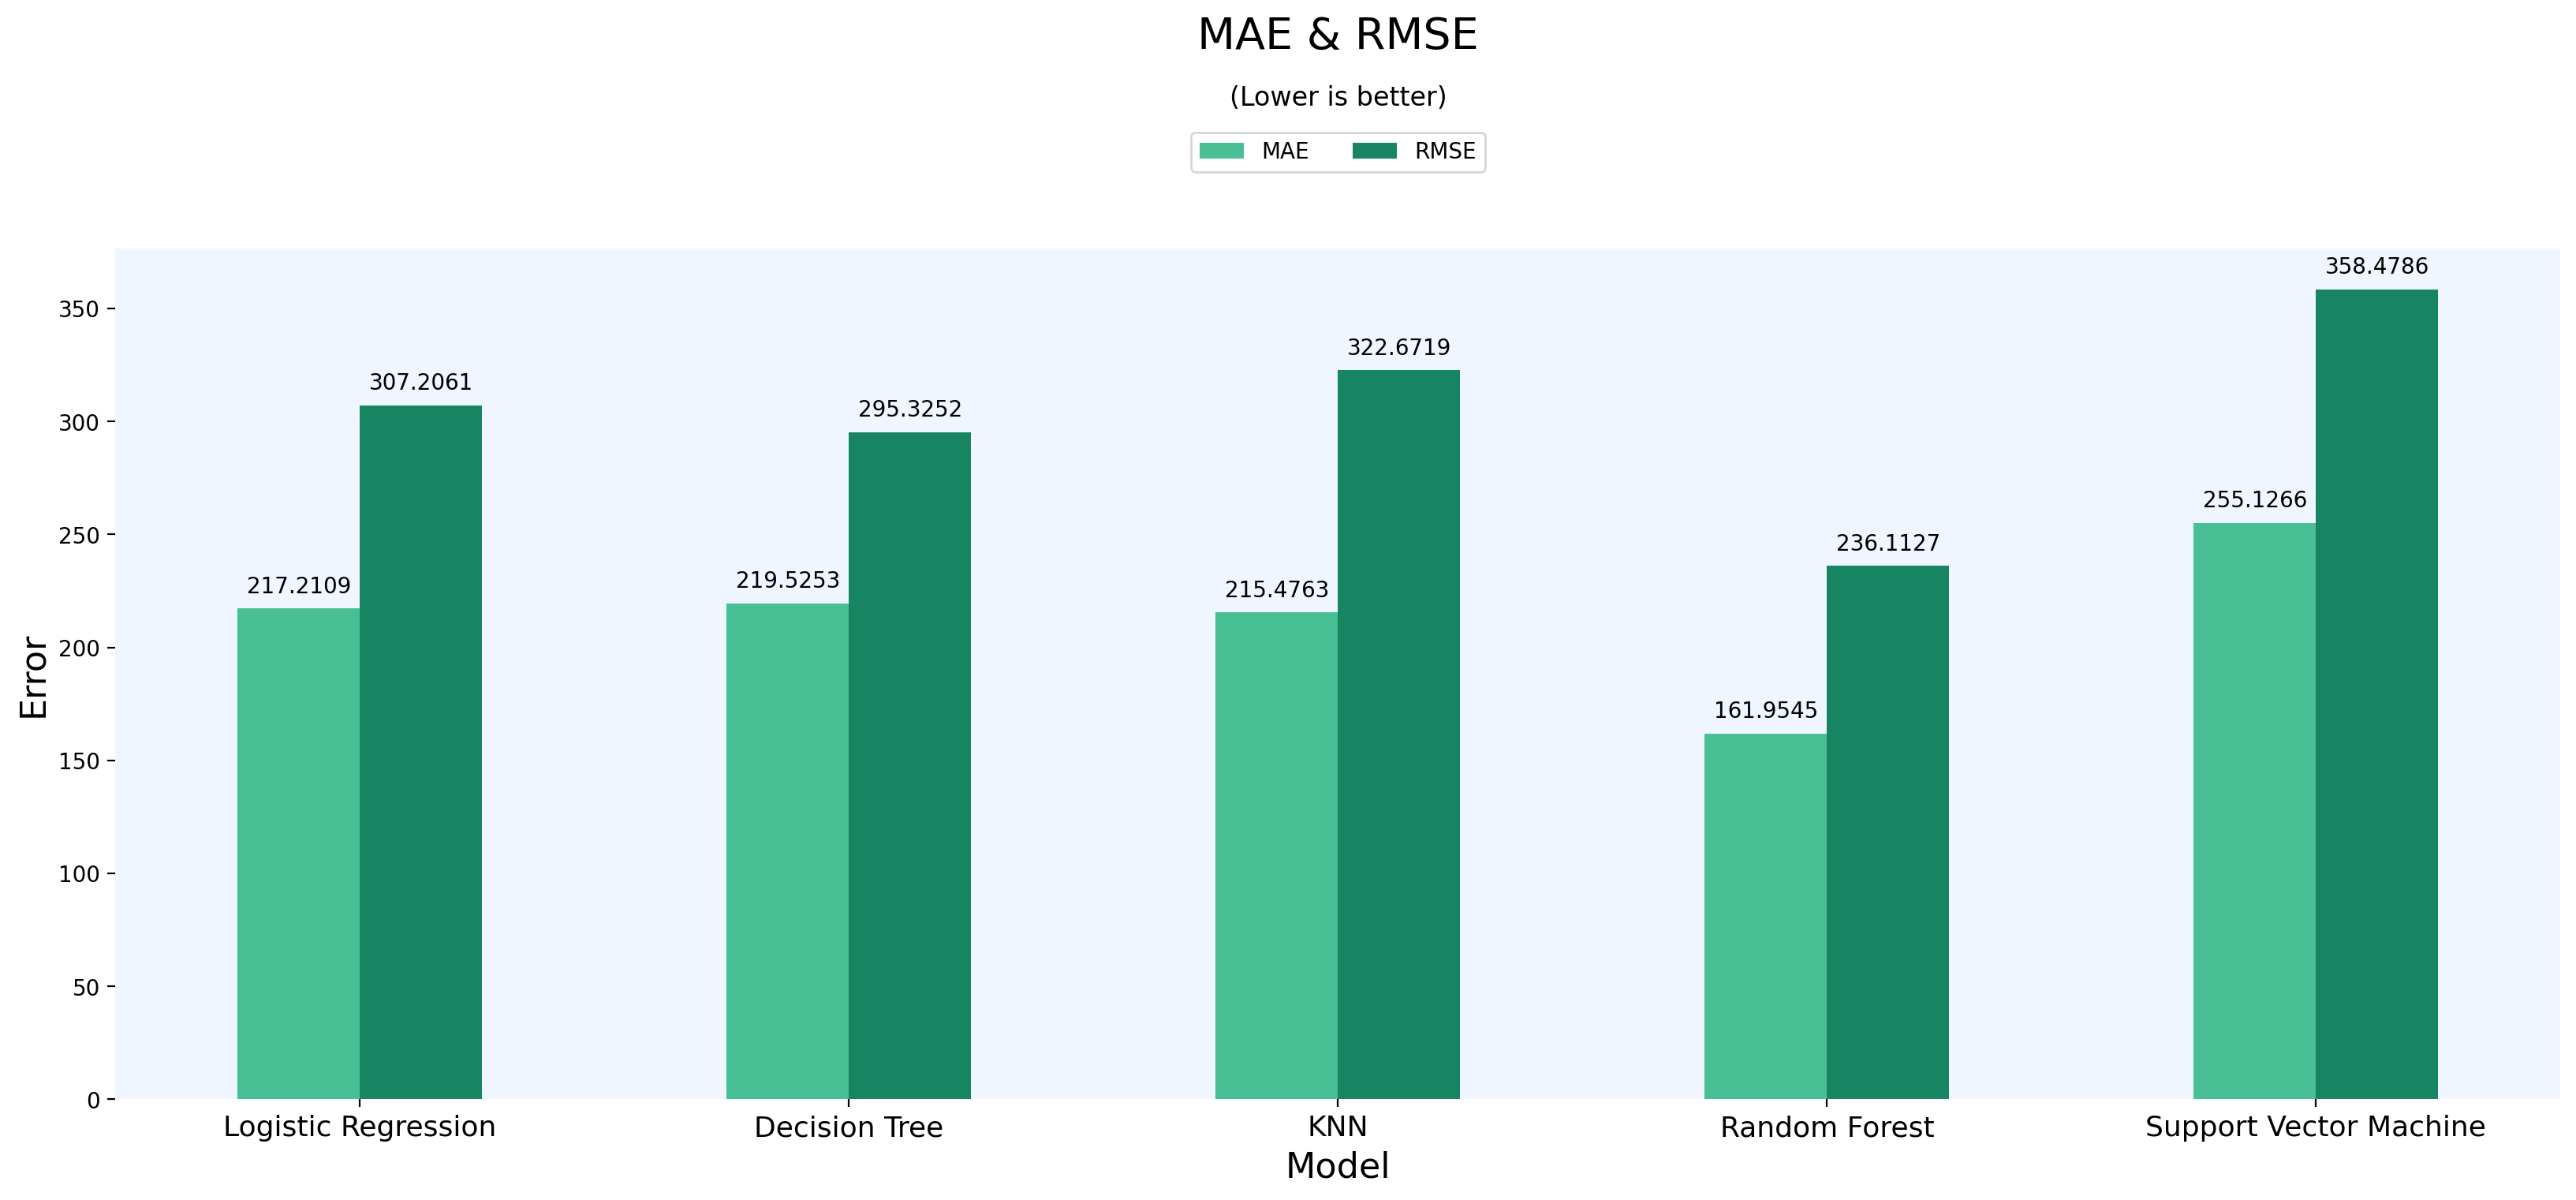

In [35]:
plt.figure(figsize=(20,7), dpi=200)
sns.barplot(data=df_error, x='Model', y='Error', hue='Type', width=0.5, palette=['#34d399', '#059669'])
setGraphBG(title='MAE & RMSE', subtitle='Lower is better', xlabel='Model', ylabel='Error', showlegend=True, verbose=True)

# Feature Importance

In [36]:
Feature_df = pd.concat([
    pd.DataFrame(x.columns, columns=['Feature name']),
    pd.DataFrame(rf.feature_importances_, columns=['Feature Importance']),
], axis=1)
Top20 = Feature_df.nlargest(20, 'Feature Importance')

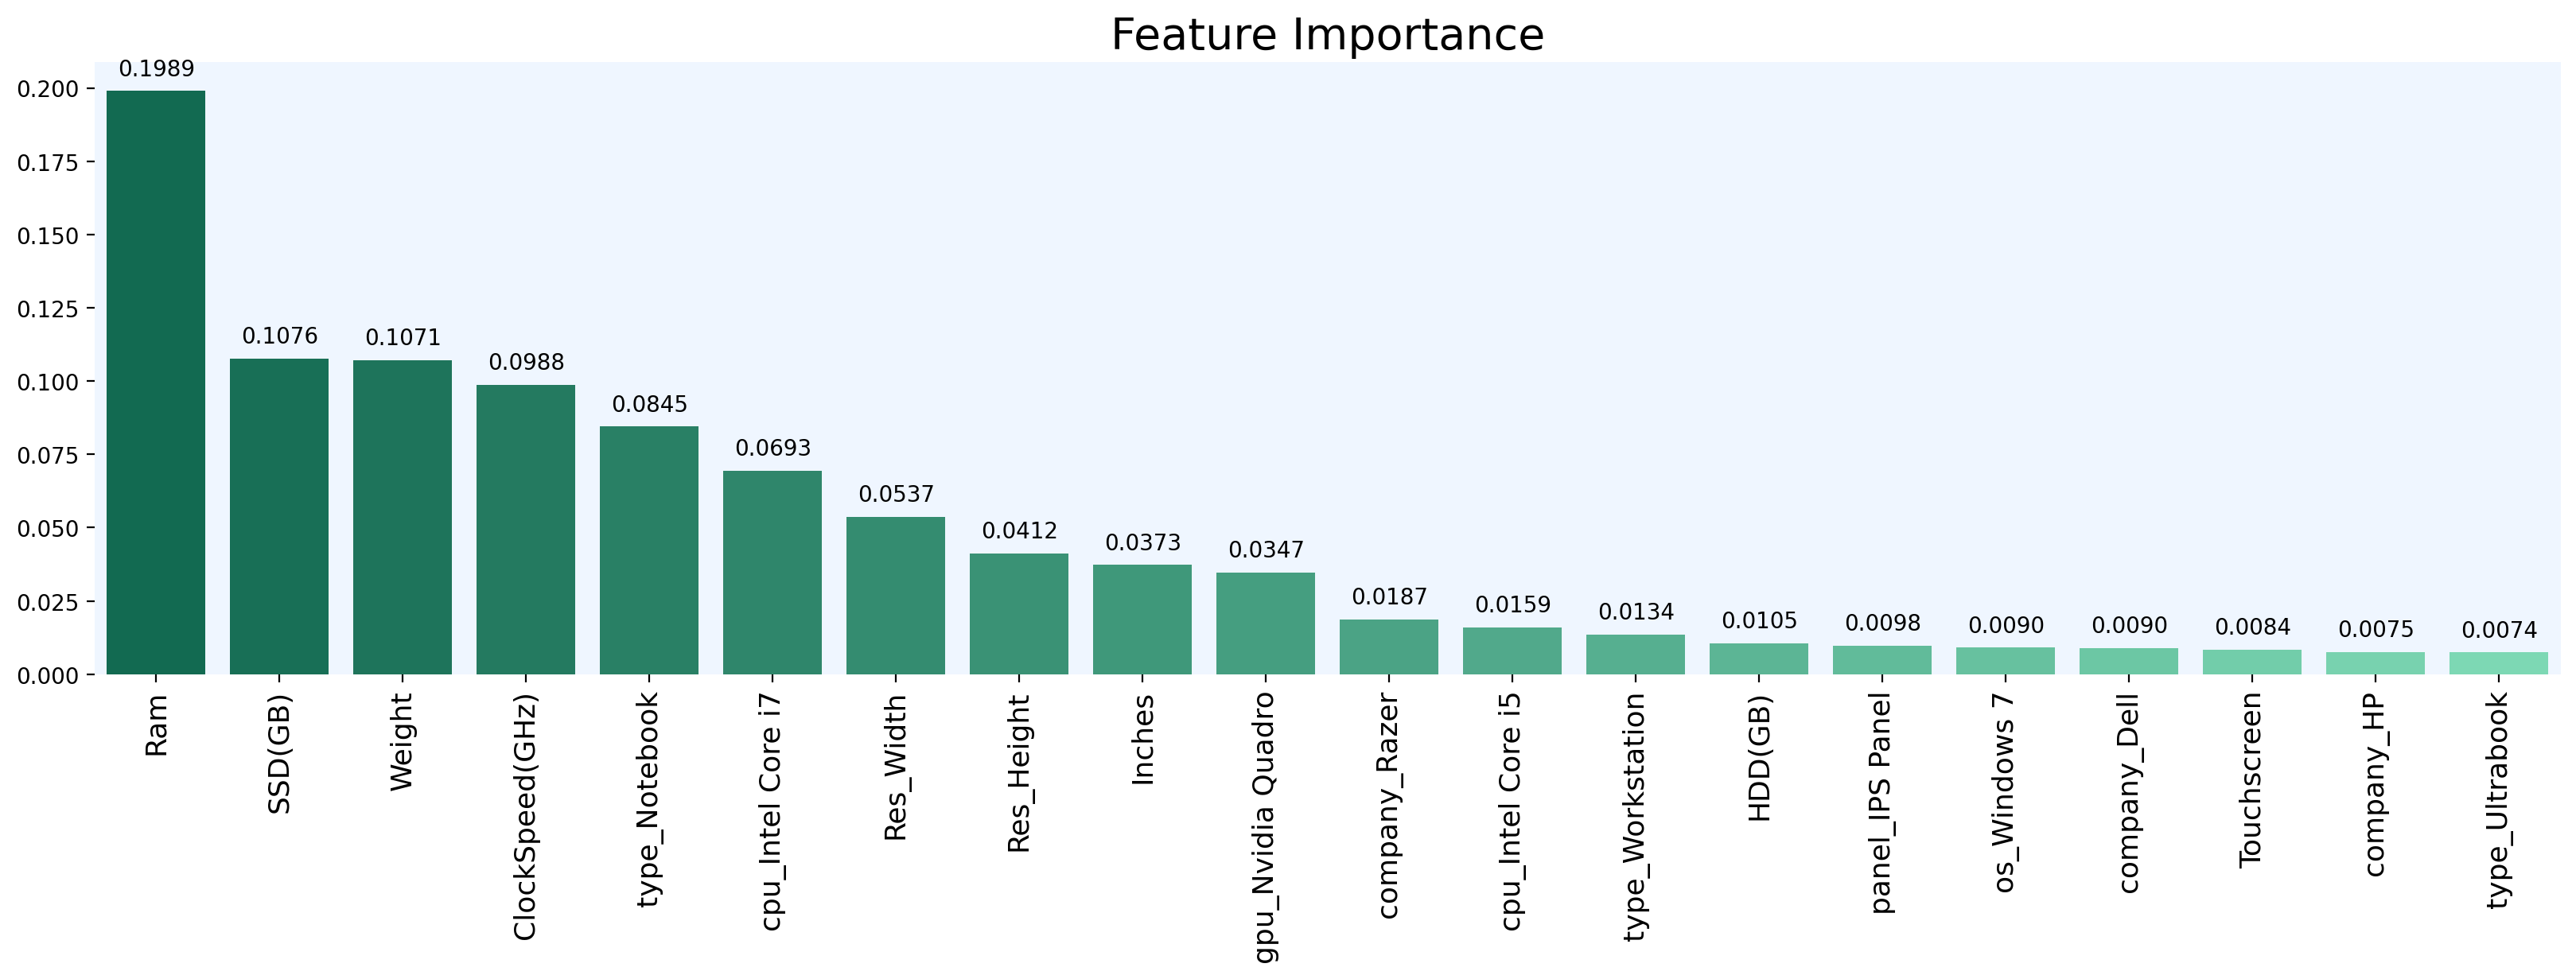

In [37]:
plt.figure(figsize=(20,5), dpi=200)
sns.barplot(data=Top20, x='Feature name', y='Feature Importance', palette=cmap)
setGraphBG(title='Feature Importance', xtick_angle=90, verbose=True)

# K-Fold Cross Validation

In [38]:
kf_scores = cross_validate(rf, x, y, cv=KFold(n_splits=10), scoring='r2')
cv_scores = kf_scores['test_score']

In [39]:
print(f"Min score: {cv_scores.min()}")
print(f"Max score: {cv_scores.max()}")
print(f"Mean score: {cv_scores.mean()}")

Min score: 0.7066159876706319
Max score: 0.9081108366754579
Mean score: 0.8329124923059451


# Gradio Interface

In [40]:
dfgr['TypeName'].replace('Ultrabook', 'Macbook/Ultrabook', inplace=True)
CPU = ['Intel Core i3', 'Intel Core i5', 'Intel Core i7', 'Intel Other', 'AMD']
columns = list(df.columns)
columns.remove('Price')

def ProcessInput(company,typename,opSys,weight,inches,reswidth,resheight,panel,touchscreen,cpu,clockspeed,ram,gpu,ssd,hdd):
    data = ([0] * len(columns))
    typeName = 'Ultrabook' if typename=='Macbook/Ultrabook' else typename
    if typeName!='2 in 1 Convertible': data[columns.index('type_'+typeName)] = 1
    if company!='Acer': data[columns.index('company_'+company)] = 1
    if opSys!='No OS': data[columns.index('os_'+opSys)] = 1
    if panel!='Any': data[columns.index('panel_'+panel)] = 1
    if cpu!='Intel Other': data[columns.index('cpu_'+cpu)] = 1
    if gpu!='Intel HD Graphics': data[columns.index('gpu_'+gpu)] = 1
    data[columns.index('Touchscreen')] =  touchscreen
    data[columns.index('Weight')] = weight
    data[columns.index('Res_Width')] = reswidth
    data[columns.index('Res_Height')] = resheight
    data[columns.index('Inches')] = inches
    data[columns.index('ClockSpeed(GHz)')] = clockspeed
    data[columns.index('Ram')] = ram
    data[columns.index('SSD(GB)')] = ssd
    data[columns.index('HDD(GB)')] = hdd
    return data

with gr.Blocks() as demo:
    # Input Form
    gr.HTML('</br><h1 align="center">Laptop Price Prediction</h1>')
    company = gr.Dropdown(label='Company', choices=list(sorted(dfgr['Company'].unique())), value='Apple')
    with gr.Row():
        typename = gr.Dropdown(label='Type', choices=list(sorted(dfgr['TypeName'].unique())), value='Macbook/Ultrabook')
        opSys = gr.Dropdown(label='Operating system', choices=list(sorted(dfgr['OpSys'].unique())), value='macOS')
        weight = gr.Number(label='Weight', value=1.37)
    with gr.Row():
        inches = gr.Number(label='Screen size (inches)', value=13.3)
        reswidth = gr.Number(label='Resolution (Width)', value=2560,)
        resheight = gr.Number(label='Resolution (Height)', value=1600)
    with gr.Group():
        panel = gr.Radio(label='Panel', choices=['IPS Panel','IPS Panel Retina Display', 'Any'], value='IPS Panel Retina Display')
        touchscreen = gr.Checkbox(label='Touchscreen', value=False)
    with gr.Group():
        with gr.Row():
            cpu = gr.Radio(label='CPU', choices=CPU, value='Intel Core i5')
        with gr.Row():
            clockspeed = gr.Number(label='ClockSpeed (GHz)', value=2.3)
            ram = gr.Number(label='Ram (GB)', value=8)
        with gr.Row():
            gpu = gr.Radio(label='GPU', choices=list(dfgr['GPU'].unique()), value='Intel Iris')
    with gr.Row():
        ssd = gr.Number(label='SSD (GB)', value=128)
        hdd = gr.Number(label='HDD (GB)', value=0)
    submit_btn = gr.Button("Submit")
    with gr.Column(visible=False) as output:
        price = gr.Number(label='Price (euro)', precision=2)
        dataframe = gr.Dataframe(label='Input DataFrame')

    # Components
    input_components = [company,typename,opSys,weight,inches,reswidth,resheight,panel,touchscreen,cpu,clockspeed,ram,gpu,ssd,hdd]
    output_components = [price, dataframe, output]

    def Submit(*values):
        input = ProcessInput(*values)
        df_input = pd.DataFrame([input], columns=columns)
        result = rf.predict([input])[0]
        return {output: gr.update(visible=True), price:result, dataframe: df_input}


    submit_btn.click(Submit, inputs=input_components, outputs=output_components)

    
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
